In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

retail = pd.read_csv("C:/Users/user/Desktop/ppg/OnlineRetail.csv" , encoding = 'unicode_escape')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


# EXPLORATION OF DATA

In [2]:
#missing values
retail.isna().sum()
#customer id has the maximum missing values we get to know this 

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [3]:
df1 = retail[pd.notnull(retail['CustomerID'])]
df1.Quantity.min()

-80995

In [4]:
df1 = df1[(df1['Quantity']>0)]

In [5]:
import datetime as dt
NOW = dt.datetime(2011,12,10)
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])

In [6]:
df1['TotalPrice'] = df1['Quantity'] * df1['UnitPrice']
rfmTable = df1.groupby('CustomerID').agg({'InvoiceDate': lambda x: (NOW - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalPrice': lambda x: x.sum()})
rfmTable['InvoiceDate'] = rfmTable['InvoiceDate'].astype(int)
rfmTable.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency', 
                         'TotalPrice': 'monetary_value'}, inplace=True)
rfmTable.head()

,recency,frequency,monetary_value
CustomerID,,,
12346.0,325,1,77183.60
12347.0,39,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40


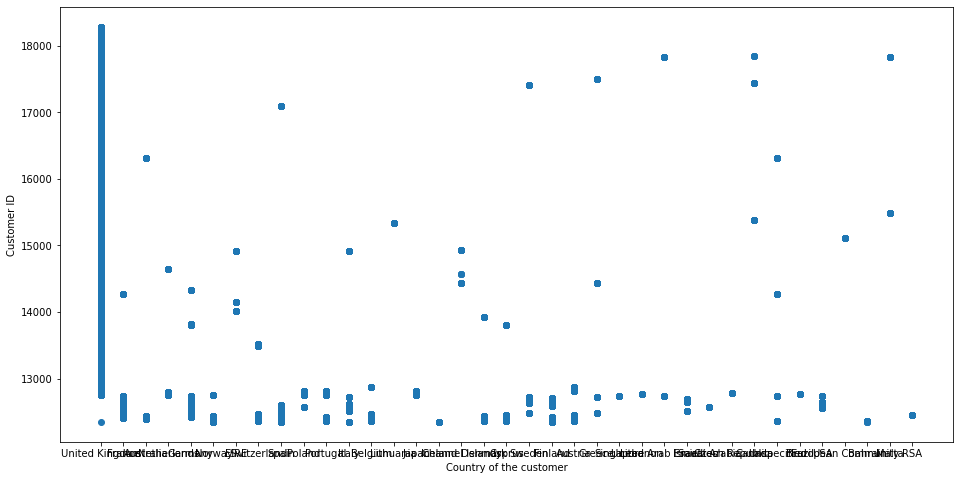

In [7]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df1['Country'],df1['CustomerID'])
ax.set_xlabel('Country of the customer')
ax.set_ylabel('Customer ID')
plt.show()

In [8]:
df1 = df1.loc[df1['Country'] == 'United Kingdom']
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34


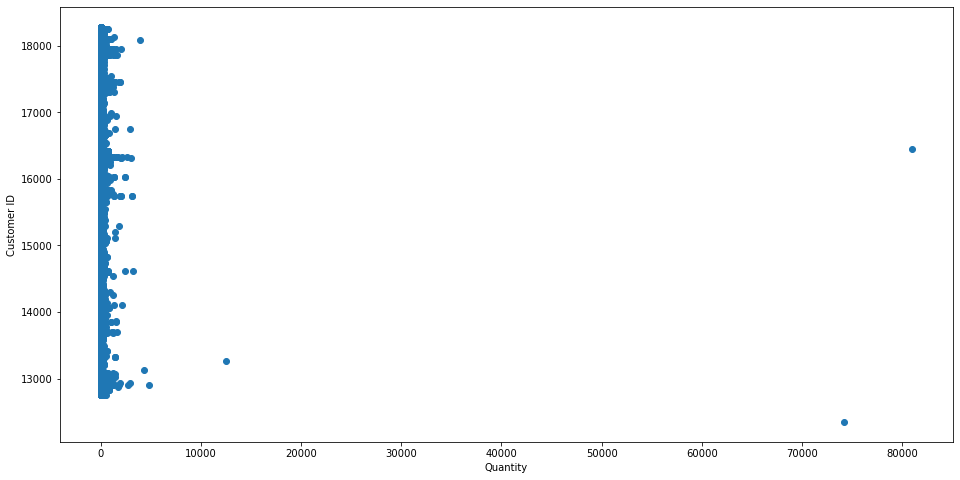

In [9]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df1['Quantity'],df1['CustomerID'])
ax.set_xlabel('Quantity')
ax.set_ylabel('Customer ID')
plt.show()

In [10]:
df1['TotalPrice'] = df1['Quantity'] * df1['UnitPrice']
rfmTable = df1.groupby('CustomerID').agg({'InvoiceDate': lambda x: (NOW - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalPrice': lambda x: x.sum()})
rfmTable['InvoiceDate'] = rfmTable['InvoiceDate'].astype(int)
rfmTable.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency', 
                         'TotalPrice': 'monetary_value'}, inplace=True)
rfmTable.head()

,recency,frequency,monetary_value
CustomerID,,,
12346.0,325,1,77183.60
12747.0,22,103,4196.01
12748.0,4,4596,33719.73
12749.0,22,199,4090.88
12820.0,44,59,942.34


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
stndrd = StandardScaler()
rfm =stndrd.fit_transform(rfmTable)
rfm

array([[ 1.91613440e+00, -4.10395112e-01,  1.00681742e+01],
       [-7.17955379e-01,  5.79924468e-02,  3.11737714e-01],
       [-8.74435960e-01,  2.06900052e+01,  4.25824834e+00],
       ...,
       [ 9.59864185e-01, -3.59882729e-01, -2.25353203e-01],
       [-8.30969132e-01,  3.05659123e+00,  3.08743313e-02],
       [-9.17902788e-01, -9.35447047e-02, -3.55971486e-03]])

# MODELLING

In [13]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import classification_report , confusion_matrix

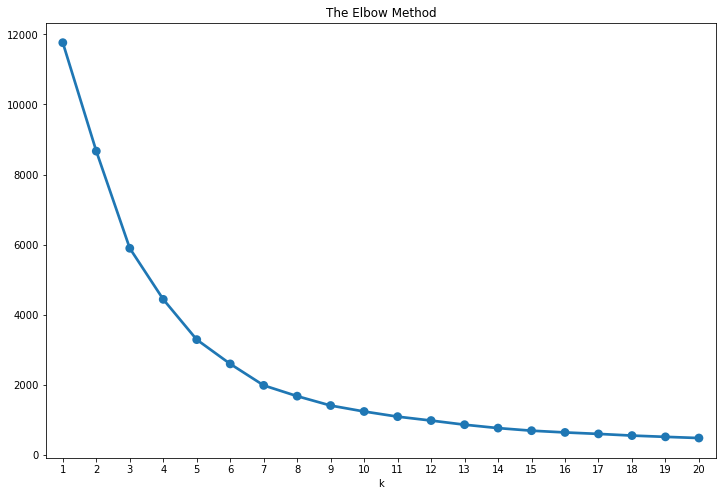

In [14]:
from sklearn.cluster import KMeans
import seaborn as sns
sse = {}
# Fit KMeans and calculate SSE for each k
for k in range(1, 21):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(rfm)
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_
# Plotting the elbow plot
plt.figure(figsize=(12,8))
plt.title('The Elbow Method')
plt.xlabel('k'); 
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [15]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm)

KMeans(max_iter=50, n_clusters=4)

In [16]:
kmeans.labels_

array([1, 3, 2, ..., 0, 3, 3])

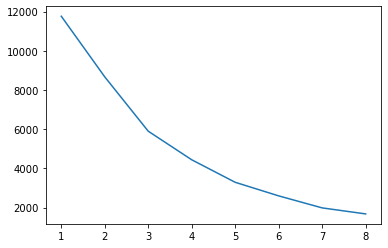

In [17]:
ssd = []
range_n_clusters = [1, 2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(range_n_clusters, ssd)

In [18]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.9192645522204248
For n_clusters=3, the silhouette score is 0.5431945082671462
For n_clusters=4, the silhouette score is 0.5460787240327064
For n_clusters=5, the silhouette score is 0.5713087979394915
For n_clusters=6, the silhouette score is 0.5579681534704674
For n_clusters=7, the silhouette score is 0.5627784241682405
For n_clusters=8, the silhouette score is 0.46979893457182137


In [19]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm)

KMeans(max_iter=50, n_clusters=3)

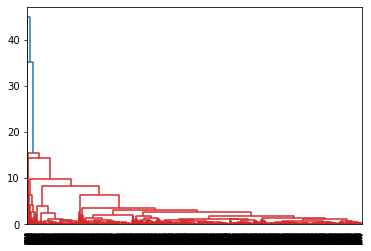

In [20]:
mergings = linkage(rfm, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

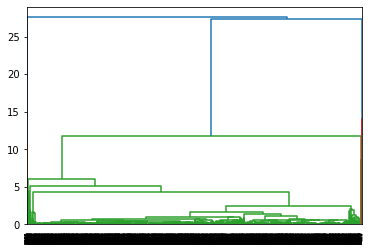

In [21]:
mergings = linkage(rfm, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [22]:
mergings = linkage(rfm_df_scaled, method="ward", metric='euclidean')
dendrogram(mergings)
plt.show()

NameError: name 'rfm_df_scaled' is not defined

In [ ]:
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

In [ ]:
rfm['Cluster_Labels'] = cluster_labels
rfm